In [31]:
import pandas as pd
import statistics
from sklearn import preprocessing
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from numpy import mean
from numpy import std
from sklearn.metrics import  confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [32]:


#Function to transpose genomic matrice, df.T can also be employed but computionally heavy for my personal laptop
def transpose_ (df_gene_full__FINAL_):
    id_gene = df_gene_full__FINAL_.columns
    id_gene_list = list(id_gene)

    Transpose_Gene = []
    for i_transpose in id_gene_list :
        b_column = df_gene_full__FINAL_[i_transpose]
        b_row = np.array(b_column)
        Transpose_Gene.append(b_row)
    return Transpose_Gene


In [33]:

#function to detele last letter of patients name in genomic set to compare both set
def new_colum ():
    list_without_A = []
    df_gene_1_sorted =df_gene_1.df[sorted(df_gene_1.df.columns)]
    for name_TCGA in (list(df_gene_1_sorted.columns)):
        newString = name_TCGA.rstrip(name_TCGA[-1])
        list_without_A.append(newString)
    df_gene_1_sorted.set_axis(list_without_A, axis=1)
    
    return df_gene_1_sorted,list_without_A



In [34]:
#function to delete in the clinical set, patients not present in genomic set.
# Index to drop genes, were typed manually, from an issue with the type of variable, but can be retrieved with line index_genes.
def id_iden(list_without_A):
    list_name_not_present = []
    Id_TCGA__ =df_clin_['Sample ID']
    Id_TCGA_list__ =list(Id_TCGA__)
    list_a = []
    for indice_TCGA in range(0,len(Id_TCGA_list__)) :
        if Id_TCGA_list__[indice_TCGA] not in list_without_A :
            list_a.append(Id_TCGA_list__[indice_TCGA])
            
          #  index_genes = df_clin_.index[Id_TCGA__ == Id_TCGA_list__[indice_TCGA]].astype(int)
            v = df_clin_.iloc[indice_TCGA].name
            b = v.tolist()
    df_clin__ =  df_clin_.drop(222)
   
    df_clin__ =  df_clin__.drop(537)
    df_clin__ =  df_clin__.drop(1009)
    return df_clin__


In [35]:
#Function to analyse both set and compare their siilarity, so patients are in the same order


def size_simi (df_gene_1_,df_clin__):
    
    Id_TCGA =df_clin__['Sample ID'] 
    Id_TCGA_list =list(Id_TCGA)
  
    id_gene = df_gene_1_.columns
    id_gene_list = list(id_gene)

    df_gene_1_sorted_full =df_gene_1.df[sorted(df_gene_1.df.columns)]
    id_gene_full = df_gene_1_sorted_full.columns
    id_gene_full_list = list(id_gene_full)

    

    list_not_present_gene = []
    list_not_present_gene_full = []
    list__present_gene = []
    
    for id_gene in range (0, len(id_gene_list)):
        if id_gene_list[id_gene] not in Id_TCGA_list:
            
            list_not_present_gene.append(id_gene_list[id_gene])
            list_not_present_gene_full.append(id_gene_full_list[id_gene])         
       
    df_gene_1_ =  df_gene_1_.drop(columns= list_not_present_gene )
    df_gene_full =  df_gene_1_sorted_full.drop(columns= list_not_present_gene_full )

    list_double = []
    id_gene_1 = df_gene_1_.columns
    id_gene_list_1 = list(id_gene_1)
    id_gene_1_full= df_gene_full.columns
    
    for id_TCGA in range (0, len(Id_TCGA_list )):    
        id_drop_gene = id_TCGA
        while Id_TCGA_list[id_TCGA]!=id_gene_list_1[id_drop_gene] :
            name_column = df_gene_full.columns[id_drop_gene]
            df_gene_full =df_gene_full.drop(columns = name_column)
            id_gene_list_1.remove(id_gene_list_1[id_drop_gene])
          

    return df_clin__,df_gene_full

In [36]:
#First attribute selection, by deleting genes with variance inbetween patients below 2, as non predictive for classification
def  variance_clean(df_gene_final__):

    list_var = []
    df_gene_final__ = df_gene_final__.replace(to_replace=0,
           value=0.8)
    df_gene_final__ = np.log2(df_gene_final__)
    df_gene_final__var = df_gene_final__.var(axis=1)
    a = df_gene_final__var[df_gene_final__var < 2.1].dropna()
    df_gene_final__ =  df_gene_final__.drop( labels =a.index)
  
    return df_gene_final__

In [37]:
class Read_TSV:
     def __init__(self, name_file):
        self.name_file = name_file
        
     def get_tsv(self):
        self.df= pd.read_csv(self.name_file, sep='\t')
      

     def get_shape(self):
        self.row_gene, self.col_gene = self.df.shape
       


In [38]:
#Genomic set lecture
df_gene_1 = Read_TSV('TCGA_BRCA_tpm.tsv')
df_gene_1.get_tsv()
df_gene_1.get_shape()

In [39]:
#Clinical set elcture
df_clin = Read_TSV('brca_tcga_pan_can_atlas_2018_clinical_data_filtered.tsv')
df_clin.get_tsv()
df_clin.get_shape()

In [40]:
#Delete patients with unknown subtypes
nan_rows = df_clin.df.isnull().any(axis=1)
labels_nan_rows = df_clin.df[nan_rows].index

df_clin_ =  df_clin.df.drop( labels =labels_nan_rows)

In [41]:
#
df_gene_final,list_drop_A = new_colum ( )
df_clin_final = id_iden(list_drop_A)
df_clin__FINAL,df_gene_full__2 = size_simi(df_gene_final,df_clin_final)

c:\users\laura\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [42]:
#Feature selection to eliminate non predictive gene
df_gene_full__FINAL = variance_clean(df_gene_full__2)

In [43]:
#Matrix transposition
df_gene_full__FINAL_transpose = transpose_ (df_gene_full__FINAL)
df_gene_full__FINAL_transpose = pd.DataFrame(df_gene_full__FINAL_transpose)

#Label column selection
label = df_clin__FINAL['Subtype']
a = np.array(label)

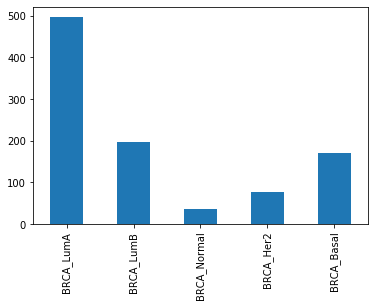

In [44]:
#Patients distribution
pd.Series(a).value_counts(sort=False).plot(kind='bar')
plt.show()


#Option to upsample Normal and Her2 classes, as under-represented in the set
#su = SMOTE(random_state=42)
#X_su, y_su = su.fit_resample(df_gene_full__FINAL_transpose, label)

In [54]:
# Feature selection to delete noice, and reduce size of the set
clf =LinearSVC(C=0.01, penalty="l1", dual=False)
clf = clf.fit(df_gene_full__FINAL_transpose, a)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(df_gene_full__FINAL_transpose)
X_new = pd.DataFrame(X_new)


c:\users\laura\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
# Machine learning model , via logistic regression, solver lbfgs to save memorhy, and multinomial class and give overall better results than other solvers. Penalty l2 according to solver
#Set are splitted with StratifiedKFold to avoid overfitting while keeping balanced set
#Possibility to also train the model with cross_validate, and pileine including Features selection
acc_score = []

kf = StratifiedKFold(n_splits = 5)
logreg = LogisticRegression(max_iter = 800,multi_class='multinomial', solver='lbfgs')

for train_index, test_index in kf.split(X_new,a):
     X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
     y_train, y_test = a[train_index], a[test_index]
     logreg.fit(X_train, y_train)
     y_pred = logreg.predict(X_test)
     accuracy_score = logreg.score(X_test, y_test)
     acc_score.append(accuracy_score)
     coeff_log = logreg.coef_
     

In [47]:
#Model score
#Overall accuracy above 85%
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(mean(acc_score)))
print(confusion_matrix(y_test, logreg.predict(X_test)))


Accuracy of logistic regression classifier on test set: 0.96
[[33  0  0  1  0]
 [ 0 14  0  2  0]
 [ 0  0 97  1  1]
 [ 0  0  1 38  0]
 [ 0  1  0  0  6]]


In [23]:
# Predicive gene for each class in list_coeff_sup
list_coeff_sup = []

for inde_coeef in coeff_log :
    list_new = []
    for indice_weight in range(0, len(inde_coeef)):
        if inde_coeef[indice_weight] > 0.030 :
            
            list_new.append(indice_weight)
    list_coeff_sup.append(list_new)
print(list_coeff_sup)

0.08558305180505409
0.10694279268475453
0.13457794099457118
0.11967022318294263
0.11041303111014934


In [30]:
#Logistic model was chosen from SVM , XGBoost and decision,as more performant for these data. 
# Deep learning models were discarded as predictive genes more complicated to isolate

#Model were test without and with various features selection algorithms were test, but best resuts with LinearSVC
#Recursive feature selection can also be tested, but computionally  intensive
#SMOTE can also be included to upsample and increase patients with normal and Her2 cancer
#Traning should then be done with X_su, y_su
#From the model it is clear that the correlation between the subtype and genetic information is quite high
#However, for genes with same name but different letter A, B or C, only the A occurences were kept. Other option consists on copying subtype instances for each genes' iteration.



# Predictive genes were isolated by isolating coefficient above 0.030
#Better gene selection can be done by analysing genes with highest associated weights, and deviation inbetween the weights  for each class


#The model could be useful in real life with a larger data set, with more instance of Normal and Her2 subtype for example, covering more variants.
#Model also need some adjusting in selecting predictive genes as stated above, to understand how many genes are responsible for the classification, and comparison in between classes. As some might have very similar predictive signature

# Futher investigation need to be concluded, comparing predictive genes for each class
#and analysing associated protein and their roles.

#With more time or resources, I would like to employ Graph convolutional neural networks
#Gene does not work individually but as an ensemble, GCNN can learn from already known biological interaction and recognize their patterns. Spatial gene expression can then be retrieved from biopsie, or tissue sample.

